# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 659


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = time.strftime('%Y-%m-%d %H:%M:%S', (time.localtime(city_weather["dt"])))

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp (F)": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | danilovka
Processing Record 6 of Set 1 | bonavista
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | victoria
Processing Record 11 of Set 1 | ouallam
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | urucara
Processing Record 14 of Set 1 | geraldton
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | kristiinankaupunki
Processing Record 19 of Set 1 | aripuana
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 

Processing Record 36 of Set 4 | nikolskoye
Processing Record 37 of Set 4 | bairiki
Processing Record 38 of Set 4 | jatiroto
Processing Record 39 of Set 4 | bima
Processing Record 40 of Set 4 | ahipara
Processing Record 41 of Set 4 | port lincoln
Processing Record 42 of Set 4 | kang
Processing Record 43 of Set 4 | zaliztsi
Processing Record 44 of Set 4 | new norfolk
Processing Record 45 of Set 4 | dalton
Processing Record 46 of Set 4 | andilamena
Processing Record 47 of Set 4 | te anau
Processing Record 48 of Set 4 | luderitz
Processing Record 49 of Set 4 | lumeje
Processing Record 0 of Set 5 | moron
Processing Record 1 of Set 5 | gigmoto
Processing Record 2 of Set 5 | tautira
Processing Record 3 of Set 5 | kruisfontein
Processing Record 4 of Set 5 | honiara
Processing Record 5 of Set 5 | dandong
Processing Record 6 of Set 5 | reconquista
Processing Record 7 of Set 5 | mar del plata
Processing Record 8 of Set 5 | pacifica
Processing Record 9 of Set 5 | dwarka
Processing Record 10 of Set

Processing Record 30 of Set 8 | itarema
Processing Record 31 of Set 8 | narsaq
Processing Record 32 of Set 8 | onguday
Processing Record 33 of Set 8 | alekseyevsk
Processing Record 34 of Set 8 | lasa
Processing Record 35 of Set 8 | alofi
Processing Record 36 of Set 8 | boca do acre
Processing Record 37 of Set 8 | labutta
City not found. Skipping...
Processing Record 38 of Set 8 | sola
Processing Record 39 of Set 8 | inhambane
Processing Record 40 of Set 8 | brasileia
Processing Record 41 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 42 of Set 8 | korem
Processing Record 43 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 44 of Set 8 | saint anthony
Processing Record 45 of Set 8 | sanmenxia
Processing Record 46 of Set 8 | melita
Processing Record 47 of Set 8 | veraval
Processing Record 48 of Set 8 | vostok
Processing Record 49 of Set 8 | sioux lookout
Processing Record 0 of Set 9 | okhotsk
Processing Record 1 of Set 9 | indianola
Processing Reco

Processing Record 18 of Set 12 | makakilo city
Processing Record 19 of Set 12 | kirakira
Processing Record 20 of Set 12 | samarinesti
Processing Record 21 of Set 12 | vila velha
Processing Record 22 of Set 12 | sitka
Processing Record 23 of Set 12 | pitanga
Processing Record 24 of Set 12 | panguipulli
Processing Record 25 of Set 12 | tamandare
Processing Record 26 of Set 12 | bargal
City not found. Skipping...
Processing Record 27 of Set 12 | itoman
Processing Record 28 of Set 12 | turuvekere
Processing Record 29 of Set 12 | hella
Processing Record 30 of Set 12 | we
City not found. Skipping...
Processing Record 31 of Set 12 | okha
Processing Record 32 of Set 12 | kaeo
Processing Record 33 of Set 12 | balad
Processing Record 34 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 35 of Set 12 | kalispell
Processing Record 36 of Set 12 | muscatine
Processing Record 37 of Set 12 | kitob
Processing Record 38 of Set 12 | bowen
Processing Record 39 of Set 12 | kirksville
Process

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City            610
Lat             610
Lng             610
Max Temp (F)    610
Humidity        610
Cloudiness      610
Wind Speed      610
Country         610
Date            610
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,66.18,96,100,5.99,ZA,2023-01-30 16:15:50
1,atuona,-9.8000,-139.0333,79.12,79,53,20.02,PF,2023-01-30 16:15:26
2,butaritari,3.0707,172.7902,80.94,77,66,20.27,KI,2023-01-30 16:15:27
3,danilovka,50.3557,44.1168,30.92,96,100,9.71,RU,2023-01-30 16:15:52
4,bonavista,48.6499,-53.1147,34.38,88,100,11.72,CA,2023-01-30 16:15:52


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,66.18,96,100,5.99,ZA,2023-01-30 16:15:50
1,atuona,-9.8000,-139.0333,79.12,79,53,20.02,PF,2023-01-30 16:15:26
2,butaritari,3.0707,172.7902,80.94,77,66,20.27,KI,2023-01-30 16:15:27
3,danilovka,50.3557,44.1168,30.92,96,100,9.71,RU,2023-01-30 16:15:52
4,bonavista,48.6499,-53.1147,34.38,88,100,11.72,CA,2023-01-30 16:15:52


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

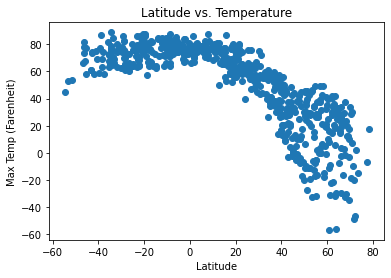

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp (F)"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Farenheit)')
plt.title('Latitude vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

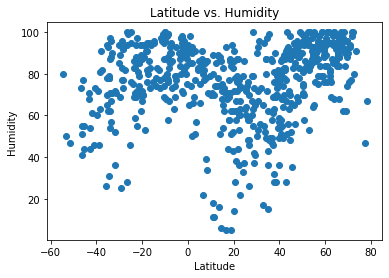

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

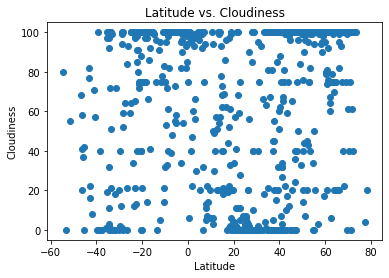

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

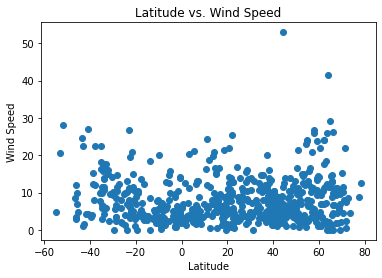

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df_s["Lat"]
y_values = city_data_df_s["Max Temp (F)"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(columns = ["City_ID", "City", "Lat", "Lng", "Max Temp (F)", "Humidity", 
                               "Cloudiness", "Wind Speed", "Country", "Date"])

northern_hemi_df = city_data_df[(city_data_df["Lat"] >= 0)]
    
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,butaritari,3.0707,172.7902,80.94,77,66,20.27,KI,2023-01-30 16:15:27
3,danilovka,50.3557,44.1168,30.92,96,100,9.71,RU,2023-01-30 16:15:52
4,bonavista,48.6499,-53.1147,34.38,88,100,11.72,CA,2023-01-30 16:15:52
8,victoria,22.2855,114.1577,61.25,60,59,5.99,HK,2023-01-30 16:08:41
9,ouallam,14.3188,2.0866,69.49,6,78,9.98,NE,2023-01-30 16:15:55


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(columns = ["City_ID", "City", "Lat", "Lng", "Max Temp (F)", "Humidity", 
                               "Cloudiness", "Wind Speed", "Country", "Date"])

southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port alfred,-33.5906,26.8910,66.18,96,100,5.99,ZA,2023-01-30 16:15:50
1,atuona,-9.8000,-139.0333,79.12,79,53,20.02,PF,2023-01-30 16:15:26
5,bredasdorp,-34.5322,20.0403,65.71,78,32,15.73,ZA,2023-01-30 16:15:53
6,hobart,-42.8794,147.3294,74.05,54,16,1.01,AU,2023-01-30 16:12:29
7,busselton,-33.6500,115.3333,66.88,67,51,16.31,AU,2023-01-30 16:15:41


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8161016185268644


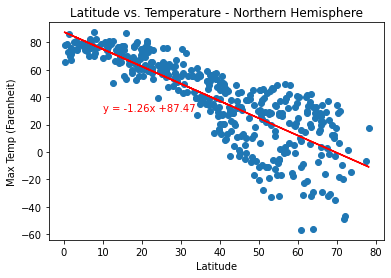

In [26]:
# set values for latitude vs. temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp (F)"]

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is {rvalue}')

# Generate scatter plot and include line of best fit
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Farenheit)')
plt.title('Latitude vs. Temperature - Northern Hemisphere')
plt.annotate(line_eq, (10,30), color='red')
plt.show()

The r-value is 0.377145514191723


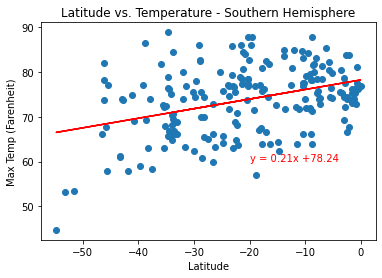

In [31]:
# set values for latitude vs. temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp (F)"]

# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is {rvalue}')

# Generate scatter plot and include line of best fit
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (Farenheit)')
plt.title('Latitude vs. Temperature - Southern Hemisphere')
plt.annotate(line_eq, (-20,60), color='red')
plt.show()

**Discussion about the linear relationship:** The high r-value relating latitude in the Northern Hemisphere with the temperature at that latitude indicates a high negative relationship between these values. Northern Hemisphere latitude may be used to predict the temperature at that latitude based on the line of regression. However, the r-value relating Southern Hemisphere latitude and temperature at that latitude is very low positive relationship. There is not a clear relationship between Southern Hemisphere latitude and temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.40543123178936824


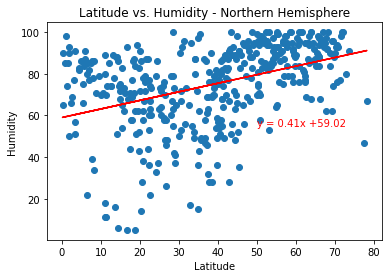

In [36]:
# set values for latitude vs. humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is {rvalue}')

# Generate scatter plot and include line of best fit
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity - Northern Hemisphere')
plt.annotate(line_eq, (50,55), color='red')
plt.show()

The r-value is 0.4787592976081052


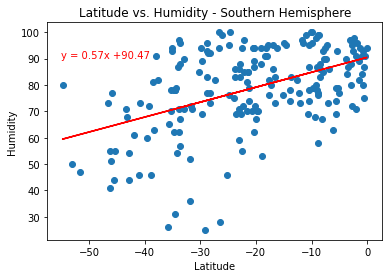

In [39]:
# set values for latitude vs. humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is {rvalue}')

# Generate scatter plot and include line of best fit
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity - Southern Hemisphere')
plt.annotate(line_eq, (-55,90), color='red')
plt.show()

**Discussion about the linear relationship:** The r-value relating latitude with the humidity at that latitude indicates a low positive relationship between these values. Latitude does not have a strong linear relationship to humidity at that latitude in the Northern or Southern hemisphere, based on the dataset.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.3080323063228175


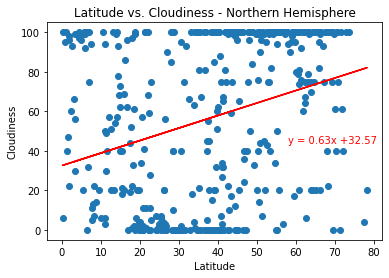

In [42]:
# set values for latitude vs. cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is {rvalue}')

# Generate scatter plot and include line of best fit
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness - Northern Hemisphere')
plt.annotate(line_eq, (58,44), color='red')
plt.show()

The r-value is 0.48914215663285926


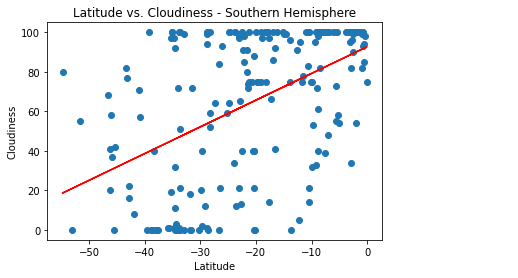

In [43]:
# set values for latitude vs. cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is {rvalue}')

# Generate scatter plot and include line of best fit
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness - Southern Hemisphere')
plt.annotate(line_eq, (10,30), color='red')
plt.show()

**Discussion about the linear relationship:** The r-value relating latitude with the cloudiness at that latitude indicates a low positive relationship between these values. There are clusters of values at the far edges of these graphs, indicating either clear skies or fully overcast weather at specific latitudes, but this means there are many outliers in the data. Latitude does not have a strong linear relationship to cloudiness at that latitude in the Northern or Southern hemisphere, based on the dataset.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.12476420934304806


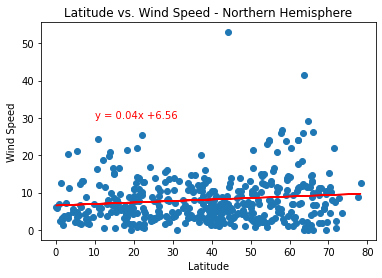

In [44]:
# set values for latitude vs. wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is {rvalue}')

# Generate scatter plot and include line of best fit
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed - Northern Hemisphere')
plt.annotate(line_eq, (10,30), color='red')
plt.show()

The r-value is -0.38758112042923815


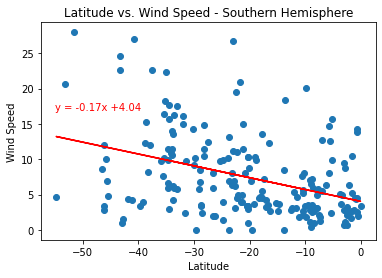

In [46]:
# set values for latitude vs. wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

print(f'The r-value is {rvalue}')

# Generate scatter plot and include line of best fit
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed - Southern Hemisphere')
plt.annotate(line_eq, (-55,17), color='red')
plt.show()

**Discussion about the linear relationship:** The r-value relating latitude with the wind speed at that latitude indicates a low negative relationship between these values in the Southern Hemisphere. The Northern Hemisphere's data indicates a positive relationship that is close to zero, which suggests that latitude and wind speed are uncorrelated. Latitude does not have a strong linear relationship to wind speed at that latitude in the Northern or Southern hemisphere, based on the dataset. 